![](img.gif)

## Importing libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\DELL\AppData\Local\Temp\ipykernel_18844\1216987746.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the dataset

In [3]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Information about dataset

In [4]:
df.shape

(50000, 2)

In [5]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.duplicated().sum()

418

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


## Visualizations

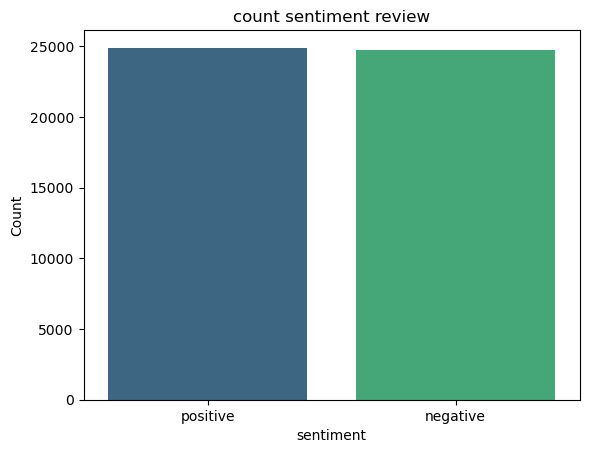

In [11]:
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('count sentiment review')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

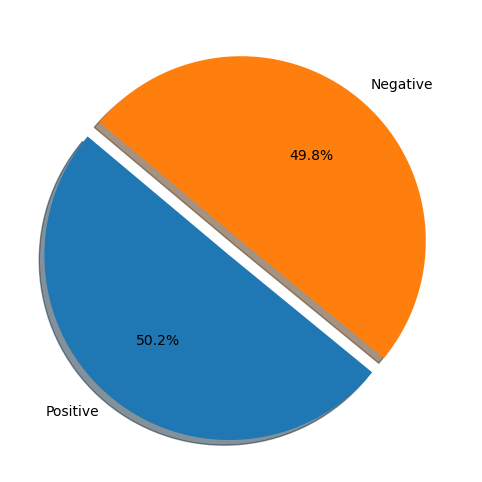

In [51]:
sentiment_counts = df['sentiment'].value_counts()
colors = ['#636efb', '#01008c']
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=['Positive', 'Negative'],
        autopct='%1.1f%%', startangle=140, explode=(0.1, 0), shadow=True)
plt.show()

Both graphs show the data is balanced

## Pre-processing

### Lowercasing

In [13]:
df['review'] = df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### Removing HTML tags

In [14]:
def remove_html_tag(text):
    pattern = re.compile(r'<[^>]+>')
    return pattern.sub(r'', text)

In [15]:
df['review'] = df['review'].apply(remove_html_tag)

In [16]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### Removing punctuation

In [17]:
import string
def remove_pun(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [18]:
df['review'] = df['review'].apply(remove_pun)

In [19]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [20]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [21]:
df['review'] = df['review'].apply(data_processing)

In [22]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [23]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [24]:
df['review'] = df['review'].apply(stemming)

In [25]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [26]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment


In [27]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18844\159144519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sentiment.replace("positive", 1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18844\159144519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [28]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


## Model building

### Train-test split

In [29]:
X = df['review']
Y = df['sentiment']

In [30]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [31]:
X.shape

(49582, 221477)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [33]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34707, 221477)
Size of y_train:  (34707,)
Size of x_test:  (14875, 221477)
Size of y_test:  (14875,)


### Naive bayes

In [34]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

In [35]:
nb_accuracy = accuracy_score(y_test,nb_pred)
print("Accuracy: {:.2f}%".format(nb_accuracy*100))

Accuracy: 86.38%


In [36]:
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

[[6454  950]
 [1076 6395]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7404
           1       0.87      0.86      0.86      7471

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



### Logistic Regression

In [37]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [38]:
lr_accuracy = accuracy_score(y_test,lr_pred)
print("Accuracy: {:.2f}%".format(lr_accuracy*100))

Accuracy: 89.38%


In [39]:
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

[[6521  883]
 [ 696 6775]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7404
           1       0.88      0.91      0.90      7471

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



### LinearSVC 

In [40]:
linear_svc = LinearSVC(C=0.5, random_state=42)

In [41]:
linear_svc.fit(x_train, y_train)
predict = linear_svc.predict(x_test)

In [42]:
svc_accuracy = accuracy_score(y_test,predict)
print("Accuracy: {:.2f}%".format(svc_accuracy*100))

Accuracy: 89.85%


In [43]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[6566  838]
 [ 672 6799]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7404
           1       0.89      0.91      0.90      7471

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875



## Comparison

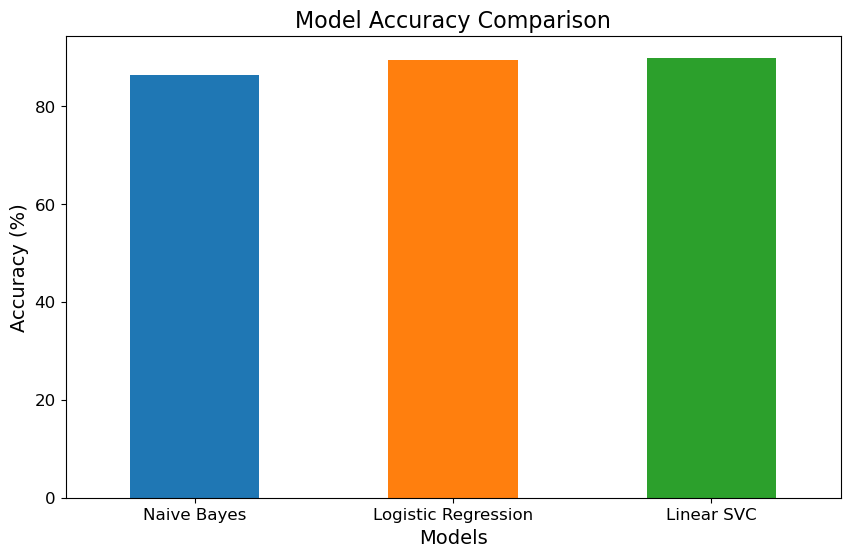

In [44]:
model_compare = pd.DataFrame({
    "Naive Bayes": [nb_accuracy * 100],
    "Logistic Regression": [lr_accuracy * 100],
    "Linear SVC": [svc_accuracy * 100],
})

model_compare = model_compare.T
model_compare.columns = ["Accuracy"]

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
model_compare["Accuracy"].plot.bar(
    figsize=(10, 6), color=colors, legend=False
)

plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Linear SVC showed better accuracy(89.85%) than Logistic Regression(89.38%) and Naive Bayes(86.38%)